# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    Optimize: period, sma, percent stop loss, margin, and max number of open trades.
    
    'strategy.py' uses adjust_percent() approach
    'scaling_in_out.py' uses lower level pinkfish functions

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define Optimizations

In [4]:
# pick one
optimize_period          = False
optimize_sma             = False
optimize_pct             = False
optimize_margin          = False
optimize_max_open_trades = True

# define high low trade periods ranges
if optimize_period:
    Xs = range(2, 15, 1)
    Xs = [str(X) for X in Xs]

# define SMAs ranges
elif optimize_sma:
    Xs = range(20, 210, 10)
    Xs = [str(X) for X in Xs]

# define stop loss percentage ranges
elif optimize_pct:
    Xs = range(5, 31, 1)
    Xs = [str(X) for X in Xs]

# define margin ranges
elif optimize_margin:
    Xs = range(10, 41, 2)
    Xs = [str(X) for X in Xs]

# define max_open_trades ranges
elif optimize_max_open_trades:
    Xs = range(1, 11, 1)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1.0,
    'period' : 7,
    'sma' : 200,
    'use_regime_filter' : True,
    'max_open_trades'  : 1,
    'enable_scale_in'  : True,
    'enable_scale_out' : True
}

In [6]:
# ************** IMPORT ONLY ONE OF THESE *************
import strategy
#import scaling_in_out as strategy

Run Strategy

In [7]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_period:
        options['period'] = int(X)
    elif optimize_sma:
        options['sma'] = int(X)
    elif optimize_pct:
         options['stop_loss_pct'] = int(X)/100
    elif optimize_margin:
        options['margin'] = int(X)/10
    elif optimize_max_open_trades:
        options['max_open_trades'] = int(X)
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

1 2 3 4 5 6 7 8 9 10 

Summarize results

In [8]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,1,2,3,4,5,6,7,8,9,10
annual_return_rate,7.21,6.47,5.66,5.45,5.23,4.67,4.01,3.46,3.11,2.79
max_closed_out_drawdown,-14.63,-18.76,-22.38,-23.62,-18.22,-15.23,-14.19,-13.98,-13.72,-13.25
annualized_return_over_max_drawdown,0.49,0.34,0.25,0.23,0.29,0.31,0.28,0.25,0.23,0.21
drawdown_recovery_period,583.00,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,359.00,353.00,289.00,290.00,290.00,290.00
expected_shortfall,-7.25,-11.42,-12.20,-12.48,-12.08,-12.18,-12.15,-11.63,-11.91,-11.98
best_month,12.88,10.74,11.48,13.10,9.38,7.69,7.96,7.50,7.39,7.28
worst_month,-13.53,-17.89,-21.52,-22.99,-17.70,-14.76,-12.87,-12.22,-12.15,-11.89
sharpe_ratio,0.75,0.70,0.64,0.65,0.69,0.70,0.65,0.62,0.60,0.56
sortino_ratio,0.55,0.53,0.48,0.49,0.52,0.53,0.49,0.46,0.43,0.40
monthly_std,2.11,2.04,1.95,1.90,1.71,1.52,1.38,1.23,1.15,1.08


Bar graphs

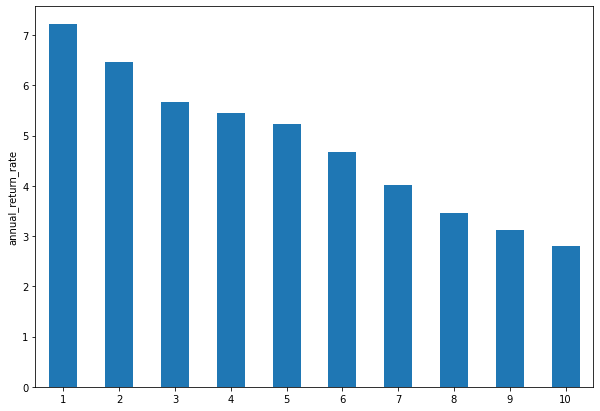

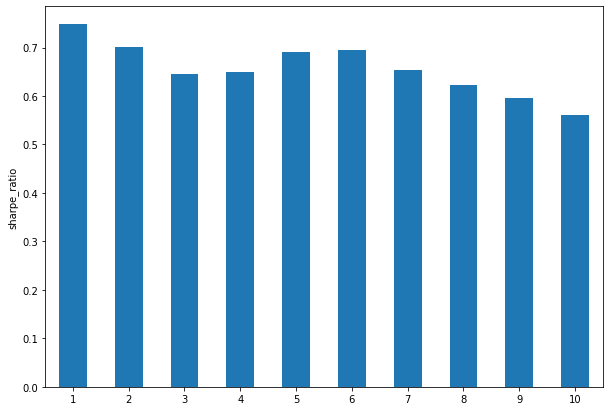

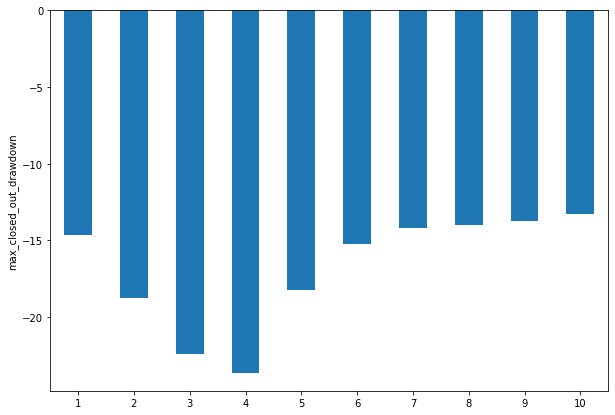

In [9]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [10]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

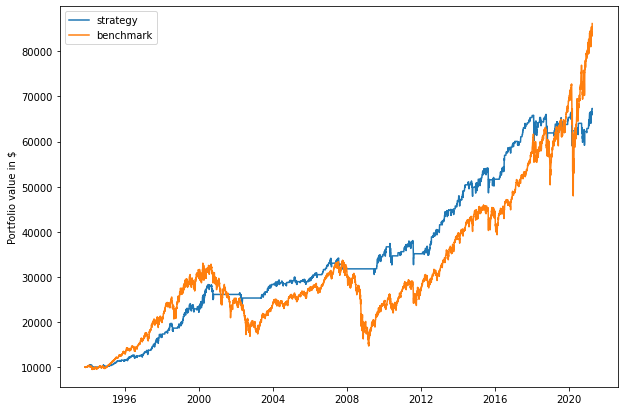

In [11]:
if   optimize_period: Y = '7'
elif optimize_sma:    Y = '70'
elif optimize_pct:    Y = '15'
elif optimize_margin: Y = '20'
elif optimize_max_open_trades: Y = '1'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)